In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
print(step_function(2))
print(step_function(-0.1))
print(step_function(0.1))
print(step_function(0))

1
0
1
0


In [3]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])

print(x > 0)

[False  True  True]


In [5]:
y = x > 0
y = y.astype(np.int)
y

C:\Users\nemok\AppData\Local\Temp\ipykernel_20080\2968035170.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

In [6]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-3.0, 3, 0.05)
y = step_function(x)

C:\Users\nemok\AppData\Local\Temp\ipykernel_20080\2318370467.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


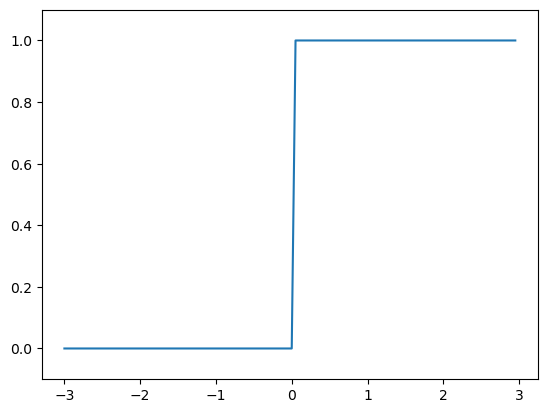

In [7]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# Sigmoid

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
sigmoid(np.array([-1.0, 1.0, 2.0]))

array([0.26894142, 0.73105858, 0.88079708])

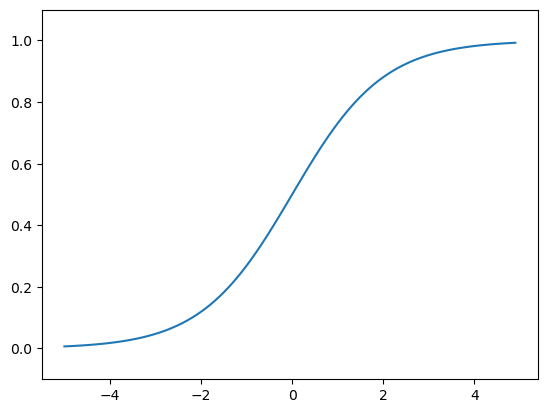

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# ReLU

In [11]:
def relu(x):
    return np.maximum(0, x)

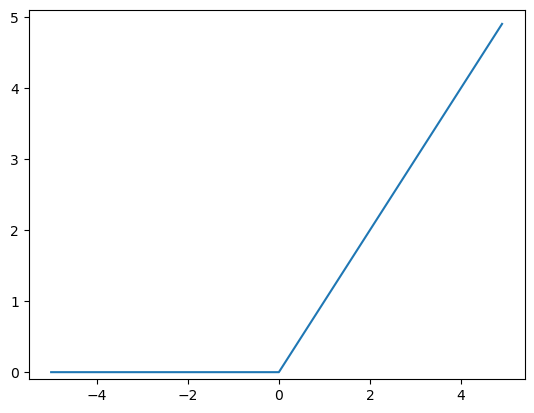

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

In [14]:
B = np.array([[1,2],[3,4],[5,6]])

print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [16]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

print(np.dot(a,b))
print(np.dot(b,a))

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [20]:
C = np.array([[1,2],[3,4]])

print(B.shape, C.shape)
print(np.dot(B, C))

(3, 2) (2, 2)
[[ 7 10]
 [15 22]
 [23 34]]


In [19]:
np.dot(C, B)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

# dot product in neuralNet

In [21]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)

print(X)
print(W)
print(Y)

[1 2]
[[1 3 5]
 [2 4 6]]
[ 5 11 17]


In [22]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],
               [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [23]:
A1 = np.dot(X, W) + B1

print(A1)

[2.1 5.2 8.3]


In [26]:
Z1 = sigmoid(A1)

print(Z1)

[0.89090318 0.9945137  0.99975154]


In [29]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1, W2) + B2
print(A2)

[0.68791852 1.65346905]


In [30]:
Z2 = sigmoid(A2)

print(Z2)

[0.66550373 0.83935935]


In [31]:
def identify_function(x):
    return x

In [32]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3

print(A3)

[0.33442224 0.73539486]


In [34]:
Y = identify_function(A3)

print(Y)

[0.33442224 0.73539486]


# slimplify

In [35]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['B1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['B2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['B3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['B1'], network['B2'], network['B3']
    
    a1 = np.dot(x, W1) + B1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + B2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + B3
    y = identify_function(a3)
    
    return y

In [36]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

print(y)

[0.31682708 0.69627909]


In [40]:
def softmax(x):
    e = np.exp(x)
    s = np.sum(e)
    
    return e / s

In [42]:
a = np.array([0.3, 2.9, 4.0])

print(softmax(a))

print(np.sum(softmax(a)))

[0.01821127 0.24519181 0.73659691]
1.0


In [47]:
def new_softmax(x):
    C = np.mean(x) # or np.max(x)
    e = np.exp(x - C)
    s = np.sum(e)
    
    return e / s

In [48]:
a = np.array([0.3, 2.9, 4.0])

print(softmax(a))

[0.01821127 0.24519181 0.73659691]


# MNIST

In [55]:
from sklearn.datasets import fetch_openml

In [56]:
mnist = fetch_openml('mnist_784')

C:\Users\nemok\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [60]:
import pandas as pd

In [62]:
dat = mnist.data.to_numpy()
tar = mnist.target.to_numpy()

In [63]:
x_train = dat[:60000,]
x_test = dat[60000:,]
y_train = tar[:60000]
y_test = tar[60000:]

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [68]:
from PIL import Image

In [80]:
import pickle

In [73]:
img = x_train[0].reshape(28, 28)

im = Image.fromarray(np.uint8(img))
display(im)

In [74]:
def get_data():
    mnist = fetch_openml('mnist_784')
    
    dat = mnist.data.to_numpy()
    tar = mnist.target.to_numpy()
    
    x_train = dat[:60000,]
    x_test = dat[60000:,]
    y_train = tar[:60000]
    y_test = tar[60000:]
    
    return x_test, y_test

In [75]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [76]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [77]:
x, t = get_data()

C:\Users\nemok\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [81]:
network = init_network()

In [93]:
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    
    if int(p) == int(t[i]):
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

C:\Users\nemok\AppData\Local\Temp\ipykernel_20080\1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy: 0.9207


# batch processing

In [94]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

C:\Users\nemok\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [100]:
t = t.astype(int)

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)

    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


C:\Users\nemok\AppData\Local\Temp\ipykernel_20080\1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
